# KNN 算法
主要是用来解决分类问题，取 K 个最邻近的平均值来对分类进行预测。最常使用欧几里得距离来判断
> 欧拉距离 $\sqrt{\Sigma{(x_i^a - x_i^b)^2}}$

In [9]:
import numpy as np
import matplotlib.pyplot as plt
from collections import Counter
from math import sqrt
from sklearn import datasets

iris = datasets.load_iris()

In [10]:
print(dir(iris))

['DESCR', 'data', 'data_module', 'feature_names', 'filename', 'frame', 'target', 'target_names']


In [22]:
x_train = iris.data
y_tarin = iris.target
print("x shape: ", x_train.shape, "; y shape: ", y_tarin.shape)

x shape:  (150, 4) ; y shape:  (150,)


In [12]:
print("========= X ===========\n", x_train, "=====================\n")

========= X ===========
 [[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]
 [5.4 3.9 1.7 0.4]
 [4.6 3.4 1.4 0.3]
 [5.  3.4 1.5 0.2]
 [4.4 2.9 1.4 0.2]
 [4.9 3.1 1.5 0.1]
 [5.4 3.7 1.5 0.2]
 [4.8 3.4 1.6 0.2]
 [4.8 3.  1.4 0.1]
 [4.3 3.  1.1 0.1]
 [5.8 4.  1.2 0.2]
 [5.7 4.4 1.5 0.4]
 [5.4 3.9 1.3 0.4]
 [5.1 3.5 1.4 0.3]
 [5.7 3.8 1.7 0.3]
 [5.1 3.8 1.5 0.3]
 [5.4 3.4 1.7 0.2]
 [5.1 3.7 1.5 0.4]
 [4.6 3.6 1.  0.2]
 [5.1 3.3 1.7 0.5]
 [4.8 3.4 1.9 0.2]
 [5.  3.  1.6 0.2]
 [5.  3.4 1.6 0.4]
 [5.2 3.5 1.5 0.2]
 [5.2 3.4 1.4 0.2]
 [4.7 3.2 1.6 0.2]
 [4.8 3.1 1.6 0.2]
 [5.4 3.4 1.5 0.4]
 [5.2 4.1 1.5 0.1]
 [5.5 4.2 1.4 0.2]
 [4.9 3.1 1.5 0.2]
 [5.  3.2 1.2 0.2]
 [5.5 3.5 1.3 0.2]
 [4.9 3.6 1.4 0.1]
 [4.4 3.  1.3 0.2]
 [5.1 3.4 1.5 0.2]
 [5.  3.5 1.3 0.3]
 [4.5 2.3 1.3 0.3]
 [4.4 3.2 1.3 0.2]
 [5.  3.5 1.6 0.6]
 [5.1 3.8 1.9 0.4]
 [4.8 3.  1.4 0.3]
 [5.1 3.8 1.6 0.2]
 [4.6 3.2 1.4 0.2]
 [5.3 3.7 1.5 0.2]
 [5.  3.3 1.4 0.2]
 [7.  3.2 4.7 1.4]
 [6.4 

In [13]:
print("========= Y ===========\n", y_tarin, "=====================\n")

========= Y ===========
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2] =====================



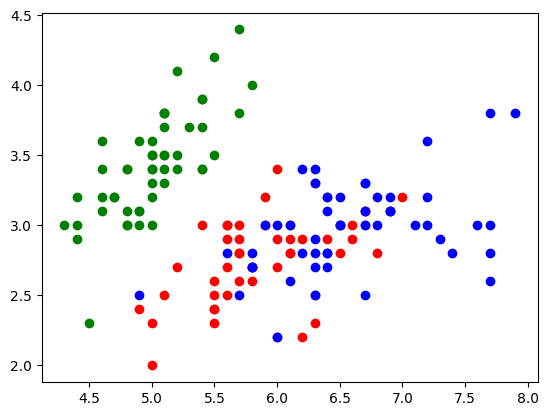

In [14]:
plt.figure()
plt.scatter(x_train[y_tarin==0, 0], x_train[y_tarin==0, 1], color='g')
plt.scatter(x_train[y_tarin==1, 0], x_train[y_tarin==1, 1], color='r')
plt.scatter(x_train[y_tarin==2, 0], x_train[y_tarin==2, 1], color='b')
plt.show()

[6.77798641 4.8563927  3.77118012 5.32757951] ;  (4,)


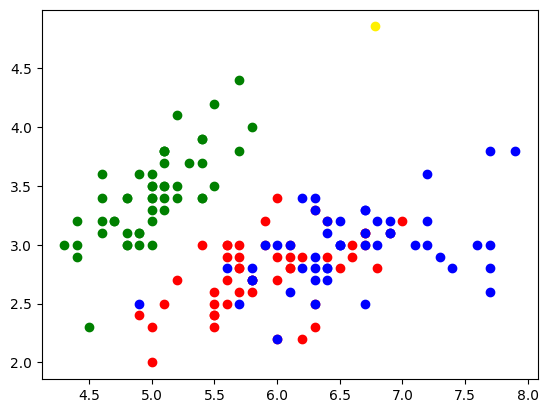

In [15]:
np.random.seed(37)
new_point = np.random.rand(4) * 4 + 3
print(new_point, "; " , new_point.shape)
plt.figure()
plt.scatter(x_train[y_tarin==0, 0], x_train[y_tarin==0, 1], color='g')
plt.scatter(x_train[y_tarin==1, 0], x_train[y_tarin==1, 1], color='r')
plt.scatter(x_train[y_tarin==2, 0], x_train[y_tarin==2, 1], color='b')
plt.scatter(new_point[0], new_point[1], color="#fff000")
plt.show()

In [35]:
distance = [sqrt(np.sum((x - new_point[0]) ** 2)) for x in x_train]
k = 37
nearest_k = [y_tarin[i] for i in np.argsort(distance)[:k]]
Counter(nearest_k)

Counter({2: 36, 1: 1})

In [20]:
from sklearn.neighbors import KNeighborsClassifier
kNN = KNeighborsClassifier(n_neighbors=17)
kNN.fit(x_train, y_tarin)
kNN.predict(new_point.reshape(1, -1))

array([2])

In [37]:
%run ../alg/machine/knn.py
knn = KNNClassifier(37)
knn.fit(x_train, y_tarin)
knn.predict(new_point.reshape(1, -1))


Counter({0: 37})


array([0])